<a href="https://colab.research.google.com/github/FarrelAD/Calculate-Subsidy-With-Fuzzy-Logic/blob/main/mamdani/mamdani_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install Required Library

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt

# Define Fuzzy Variables

In [3]:
land_area = ctrl.Antecedent(np.arange(0, 4, 0.01), 'land_area')
rice_production = ctrl.Antecedent(np.arange(0, 1.6, 0.01), 'rice_production')
irrigation = ctrl.Antecedent(np.arange(1500, 18000, 100), 'irrigation')
subsidy = ctrl.Consequent(np.arange(1, 8, 0.1), 'subsidy')

# Define Fuzzy Membership Functions

In [4]:
land_area['very small'] = fuzz.trimf(land_area.universe, [0, 0, 1])
land_area['small'] = fuzz.trimf(land_area.universe, [0.5, 1, 1.5])
land_area['medium'] = fuzz.trimf(land_area.universe, [1, 1.5, 2])
land_area['large'] = fuzz.trimf(land_area.universe, [1.5, 2, 2.5])
land_area['very large'] = fuzz.trimf(land_area.universe, [2, 3, 3])

rice_production['very low'] = fuzz.trimf(rice_production.universe, [0, 0, 0.5])
rice_production['low'] = fuzz.trimf(rice_production.universe, [0.25, 0.5, 0.75])
rice_production['medium'] = fuzz.trimf(rice_production.universe, [0.5, 0.75, 1])
rice_production['high'] = fuzz.trimf(rice_production.universe, [0.75, 1, 1.25])
rice_production['very high'] = fuzz.trimf(rice_production.universe, [1, 1.5, 1.5])

irrigation['very low'] = fuzz.trimf(irrigation.universe, [1500, 1500, 7000])
irrigation['low'] = fuzz.trimf(irrigation.universe, [4250, 7000, 9750])
irrigation['medium'] = fuzz.trimf(irrigation.universe, [7000, 9750, 12500])
irrigation['high'] = fuzz.trimf(irrigation.universe, [9750, 12500, 15250])
irrigation['very high'] = fuzz.trimf(irrigation.universe, [12500, 18000, 18000])

subsidy['very low'] = fuzz.trimf(subsidy.universe, [1, 1, 3])
subsidy['low'] = fuzz.trimf(subsidy.universe, [2, 3, 4])
subsidy['medium'] = fuzz.trimf(subsidy.universe, [3, 4, 5])
subsidy['high'] = fuzz.trimf(subsidy.universe, [4, 5, 6])
subsidy['very high'] = fuzz.trimf(subsidy.universe, [5, 7, 7])

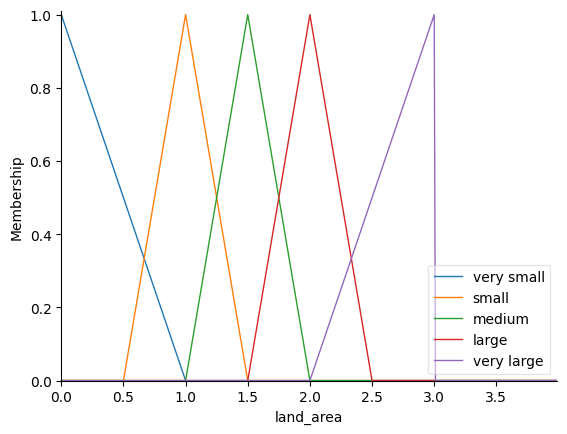

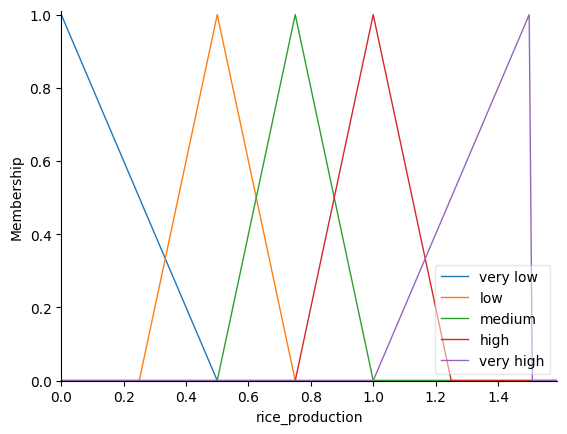

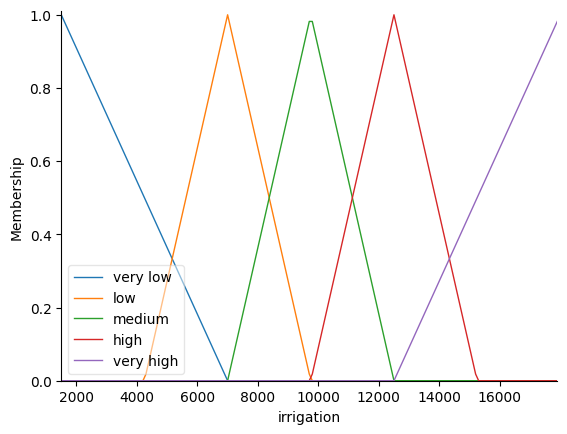

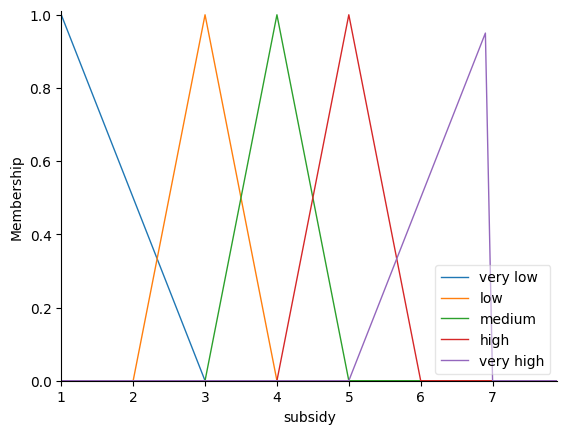

In [5]:
land_area.view()
rice_production.view()
irrigation.view()
subsidy.view()

# Define Fuzzy Rules

1. Very Small Land Area (Petani Kecil)

    IF Land Area is Very Small AND Rice Production is Very Low AND Irrigation is Very Bad THEN Subsidy is Very High

    IF Land Area is Very Small AND Rice Production is Low AND Irrigation is Bad THEN Subsidy is High

    IF Land Area is Very Small AND Rice Production is Medium AND Irrigation is Moderate THEN Subsidy is Medium

2. Small Land Area (Petani Menengah Kecil)

    IF Land Area is Small AND Rice Production is Low AND Irrigation is Very Bad THEN Subsidy is Very High

    IF Land Area is Small AND Rice Production is Medium AND Irrigation is Bad THEN Subsidy is High

    IF Land Area is Small AND Rice Production is High AND Irrigation is Moderate THEN Subsidy is Medium

3. Medium Land Area (Petani Menengah)

    IF Land Area is Medium AND Rice Production is Medium AND Irrigation is Bad THEN Subsidy is High

    IF Land Area is Medium AND Rice Production is Medium AND Irrigation is Good THEN Subsidy is Medium

    IF Land Area is Medium AND Rice Production is High AND Irrigation is Very Good THEN Subsidy is Low

4. Large Land Area (Petani Besar)

    IF Land Area is Large AND Rice Production is High AND Irrigation is Moderate THEN Subsidy is Low

    IF Land Area is Large AND Rice Production is Very High AND Irrigation is Good THEN Subsidy is Very Low

    IF Land Area is Large AND Rice Production is High AND Irrigation is Bad THEN Subsidy is Medium

5. Very Large Land Area (Petani Sangat Besar)

    IF Land Area is Very Large AND Rice Production is Very High AND Irrigation is Very Good THEN Subsidy is Very Low

    IF Land Area is Very Large AND Rice Production is High AND Irrigation is Moderate THEN Subsidy is Low

    IF Land Area is Very Large AND Rice Production is Medium AND Irrigation is Bad THEN Subsidy is Medium

# Create Control System

In [6]:
subsidy_ctrl = ctrl.ControlSystem([
  ctrl.Rule(land_area['very small'] & rice_production['very low'] & irrigation['very low'], subsidy['very high']),
  ctrl.Rule(land_area['very small'] & rice_production['low'] & irrigation['low'], subsidy['high']),
  ctrl.Rule(land_area['very small'] & rice_production['medium'] & irrigation['medium'], subsidy['medium']),
  ctrl.Rule(land_area['small'] & rice_production['low'] & irrigation['very low'], subsidy['high']),
  ctrl.Rule(land_area['small'] & rice_production['medium'] & irrigation['low'], subsidy['medium']),
  ctrl.Rule(land_area['small'] & rice_production['high'] & irrigation['medium'], subsidy['medium']),
  ctrl.Rule(land_area['medium'] & rice_production['medium'] & irrigation['low'], subsidy['high']),
  ctrl.Rule(land_area['medium'] & rice_production['medium'] & irrigation['high'], subsidy['medium']),
  ctrl.Rule(land_area['medium'] & rice_production['high'] & irrigation['very high'], subsidy['low']),
  ctrl.Rule(land_area['large'] & rice_production['high'] & irrigation['medium'], subsidy['low']),
  ctrl.Rule(land_area['large'] & rice_production['very high'] & irrigation['high'], subsidy['very low']),
  ctrl.Rule(land_area['large'] & rice_production['high'] & irrigation['low'], subsidy['medium']),
  ctrl.Rule(land_area['very large'] & rice_production['very high'] & irrigation['very high'], subsidy['very low']),
  ctrl.Rule(land_area['very large'] & rice_production['high'] & irrigation['medium'], subsidy['low']),
  ctrl.Rule(land_area['very large'] & rice_production['medium'] & irrigation['low'], subsidy['medium'])
])
subsidization = ctrl.ControlSystemSimulation(subsidy_ctrl)

# Input

Try to calculate the result with 3 case study

## Small Land Area, High Rice Prodcution, and Very High Irrigation

### Input Values

In [7]:
subsidization.input['land_area'] = 1.1
subsidization.input['rice_production'] = 1
subsidization.input['irrigation'] = 14700

### Compute The Result

In [8]:
subsidization.compute()

### Visualizing Defuzzification Process

Subsidy Output: 3.0000000000000004


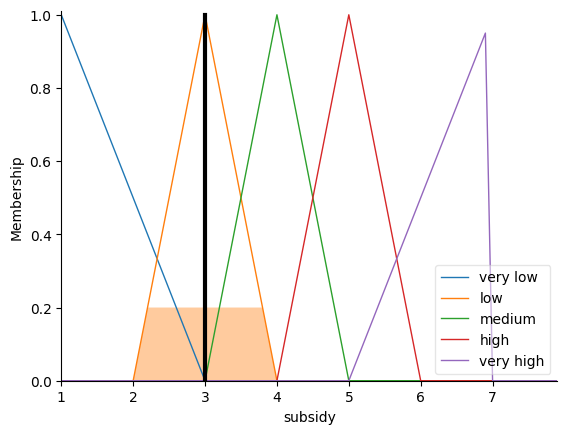

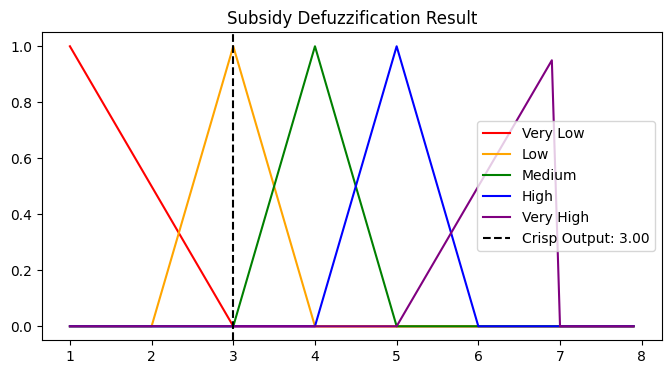

In [9]:
subsidy.view(sim=subsidization)

if 'subsidy' in subsidization.output:
    subsidy_activation = subsidization.output['subsidy']
    print(f"Subsidy Output: {subsidy_activation}")

    # Plotting the output fuzzy set with crisp result
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(subsidy.universe, subsidy['very low'].mf, 'r', label='Very Low')
    ax.plot(subsidy.universe, subsidy['low'].mf, 'orange', label='Low')
    ax.plot(subsidy.universe, subsidy['medium'].mf, 'g', label='Medium')
    ax.plot(subsidy.universe, subsidy['high'].mf, 'b', label='High')
    ax.plot(subsidy.universe, subsidy['very high'].mf, 'purple', label='Very High')
    ax.axvline(x=subsidy_activation, color='k', linestyle='--', label=f"Crisp Output: {subsidy_activation:.2f}")
    ax.set_title('Subsidy Defuzzification Result')
    ax.legend()
    plt.show()
else:
    print("No valid output computed! Adjust input values or rules.")

## Very Small Land Area, Low Rice Production, and Very Low Irrigation

### Input Values

In [10]:
subsidization.input['land_area'] = 0.2
subsidization.input['rice_production'] = 0.3
subsidization.input['irrigation'] = 3750

### Compute The Result

In [11]:
subsidization.compute()

### Visualizing Defuzzification Process

Subsidy Output: 6.17263157894737


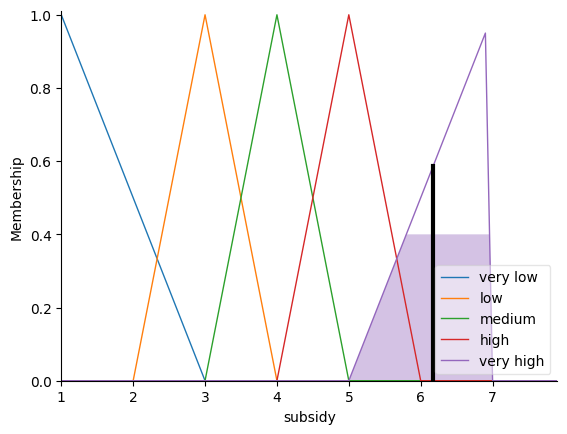

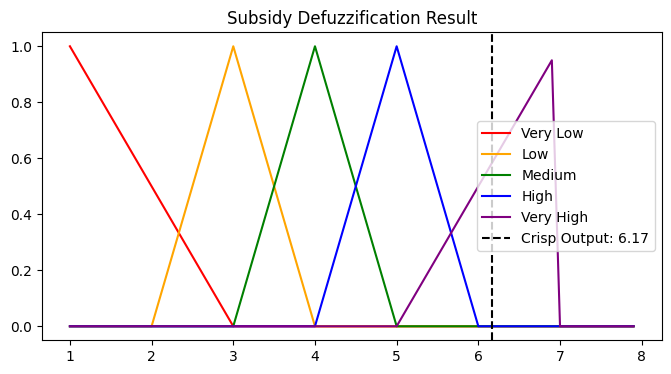

In [12]:
subsidy.view(sim=subsidization)

if 'subsidy' in subsidization.output:
    subsidy_activation = subsidization.output['subsidy']
    print(f"Subsidy Output: {subsidy_activation}")

    # Plotting the output fuzzy set with crisp result
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(subsidy.universe, subsidy['very low'].mf, 'r', label='Very Low')
    ax.plot(subsidy.universe, subsidy['low'].mf, 'orange', label='Low')
    ax.plot(subsidy.universe, subsidy['medium'].mf, 'g', label='Medium')
    ax.plot(subsidy.universe, subsidy['high'].mf, 'b', label='High')
    ax.plot(subsidy.universe, subsidy['very high'].mf, 'purple', label='Very High')
    ax.axvline(x=subsidy_activation, color='k', linestyle='--', label=f"Crisp Output: {subsidy_activation:.2f}")
    ax.set_title('Subsidy Defuzzification Result')
    ax.legend()
    plt.show()
else:
    print("No valid output computed! Adjust input values or rules.")

## Large Land Area, Low Rice Production, Very Low Irrigation

### Input Values

In [13]:
subsidization.input['land_area'] = 2.4
subsidization.input['rice_production'] = 0.6
subsidization.input['irrigation'] =  2500

### Compute The Result

In [14]:
subsidization.compute()

### Visualizing Defuzzification Process

No valid output computed! Adjust input values or rules.


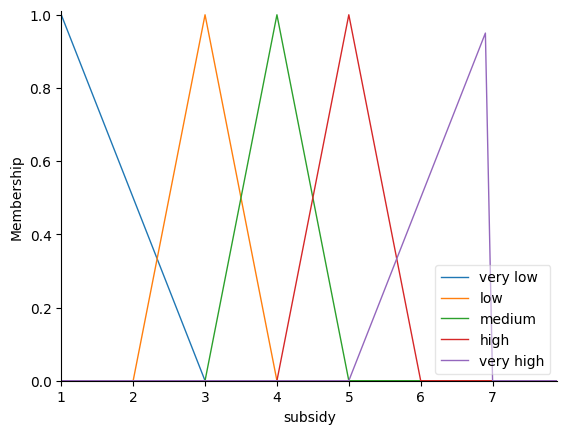

In [15]:
subsidy.view(sim=subsidization)

if 'subsidy' in subsidization.output:
    subsidy_activation = subsidization.output['subsidy']
    print(f"Subsidy Output: {subsidy_activation}")

    # Plotting the output fuzzy set with crisp result
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(subsidy.universe, subsidy['very low'].mf, 'r', label='Very Low')
    ax.plot(subsidy.universe, subsidy['low'].mf, 'orange', label='Low')
    ax.plot(subsidy.universe, subsidy['medium'].mf, 'g', label='Medium')
    ax.plot(subsidy.universe, subsidy['high'].mf, 'b', label='High')
    ax.plot(subsidy.universe, subsidy['very high'].mf, 'purple', label='Very High')
    ax.axvline(x=subsidy_activation, color='k', linestyle='--', label=f"Crisp Output: {subsidy_activation:.2f}")
    ax.set_title('Subsidy Defuzzification Result')
    ax.legend()
    plt.show()
else:
    print("No valid output computed! Adjust input values or rules.")